In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib as mpl
import plotly.offline as pyo
import plotly.graph_objs as go

In [2]:
pizzas = pd.read_csv('8358_1.csv')
print(pizzas.isnull().sum())

id                       0
address                  0
categories               0
city                     0
country                  0
keys                     0
latitude                 0
longitude                0
menuPageURL           2900
menus.amountMax        562
menus.amountMin        562
menus.currency         559
menus.dateSeen           0
menus.description     1984
menus.name               0
name                     0
postalCode              26
priceRangeCurrency    1953
priceRangeMin         1953
priceRangeMax         1953
province                 0
dtype: int64


In [3]:
inuteis = ['menuPageURL', 'id']
pizzas = pizzas.drop(inuteis, axis=1)  

In [4]:
pizzas['menus.currency'].fillna('USD',inplace=True)
pizzas['priceRangeCurrency'].fillna('USD',inplace=True)
pizzas['priceRangeMin'].fillna(round(pizzas['priceRangeMin'].mean(), 2),inplace=True)
pizzas['priceRangeMax'].fillna(round(pizzas['priceRangeMax'].mean(), 2),inplace=True)

In [5]:
print(pizzas.groupby('name')['priceRangeMax'].describe())

                                count   mean           std    min    25%  \
name                                                                       
'l Bistro                         6.0  25.00  0.000000e+00  25.00  25.00   
24 Hour Express Locksmith Inc     7.0  36.57  0.000000e+00  36.57  36.57   
7 Day 24 Hours Emergency Locks   18.0  36.57  7.311424e-15  36.57  36.57   
Abo's Pizza                       8.0  36.57  0.000000e+00  36.57  36.57   
Abyssinia Chinese                 1.0  36.57           NaN  36.57  36.57   
...                               ...    ...           ...    ...    ...   
Zone Action Park                  5.0  36.57  0.000000e+00  36.57  36.57   
Zoës Kitchen                      2.0  40.00  0.000000e+00  40.00  40.00   
Zo��s Kitchen                     2.0  40.00  0.000000e+00  40.00  40.00   
Zpizza                            3.0  36.57  0.000000e+00  36.57  36.57   
Zuccos Restaurant                 1.0  40.00           NaN  40.00  40.00   

           

In [6]:
sabores = pizzas['menus.name'].value_counts()

In [7]:
print(sabores)

menus.name
Cheese Pizza                 136
White Pizza                   75
Margherita Pizza              63
Pizza                         62
Hawaiian Pizza                54
                            ... 
Cheese Lovers Pizza            1
Bufalo Chicken Pizza           1
Italian Meat Lovers Pizza      1
Roman Pizza                    1
Shrimp Creole Pizza            1
Name: count, Length: 1598, dtype: int64


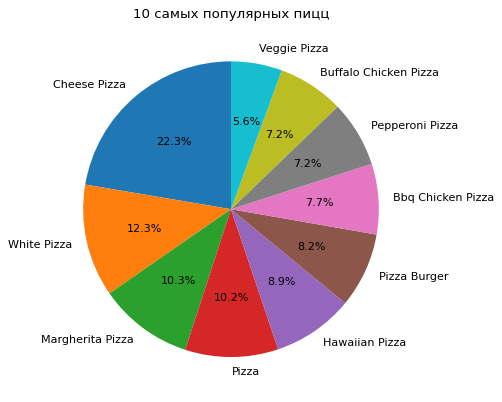

In [8]:
top_10_sabores = sabores[:10]

plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
top_10_sabores.plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('10 самых популярных пицц')
plt.ylabel('')
plt.show()

In [10]:
data = [dict(
type='scattergeo', # график точечный
locationmode='USA-states',
lon=pizzas['longitude'],
lat=pizzas['latitude'],
text=pizzas['city'], # Текст, который будет отображаться при наведении на точку
mode='markers',
marker=dict(
size=8,
opacity=0.6,
reversescale=True,
autocolorscale=False,
symbol='circle',
line=dict(
width=1,
color='rgba(102, 102, 102)'
)))]

layout = dict(
title='Локации пицц',
geo=dict(
scope='usa',
projection=dict(type='albers usa'),
showland=True,
landcolor="rgb(250, 250, 250)",
subunitcolor="rgb(217, 217, 217)",
countrycolor="rgb(217, 217, 217)",
countrywidth=0.5,
subunitwidth=0.5))

fig = go.Figure(data=data, layout=layout)

pyo.plot(fig, filename='allPizzas.html', auto_open=True)

'allPizzas.html'

In [11]:
print(pizzas['province'].str.len() == 2)

0        True
1        True
2       False
3       False
4       False
        ...  
3505    False
3506    False
3507    False
3508    False
3509     True
Name: province, Length: 3510, dtype: bool


In [12]:
# для каждого штата вычисляем среднее значение максимальной цены на пиццу.
# Это делается только для тех записей, где длина кода штата равна 2.
pizzas_provPrice = pizzas[pizzas['province'].str.len() == 2].groupby(['province'])['priceRangeMax'].mean()
print(pizzas_provPrice)

province
AK    50.000000
AL    35.407143
AR    31.310909
AZ    34.555000
CA    34.512734
CO    36.717568
CT    38.086522
DC    35.250000
DE    32.815714
FL    36.573750
GA    31.629184
HI    30.000000
IA    37.175294
ID    38.150000
IL    34.481133
IN    32.438974
KS    37.982353
KY    33.264286
LA    36.704375
MA    37.940096
MD    36.617971
ME    34.256000
MI    35.698814
MN    39.893913
MO    35.256000
MS    33.900000
MT    37.484667
NC    34.031714
ND    25.000000
NE    36.741500
NH    37.942000
NJ    38.619679
NM    51.666667
NV    38.126667
NY    36.589113
Ny    40.000000
OH    36.290246
OK    36.493846
OR    37.055714
PA    35.263193
RI    36.841750
SC    37.456500
SD    36.570000
TN    39.955385
TX    35.503504
UT    33.900000
VA    32.501622
VT    36.570000
WA    36.987838
WI    30.901250
WV    36.707200
Name: priceRangeMax, dtype: float64


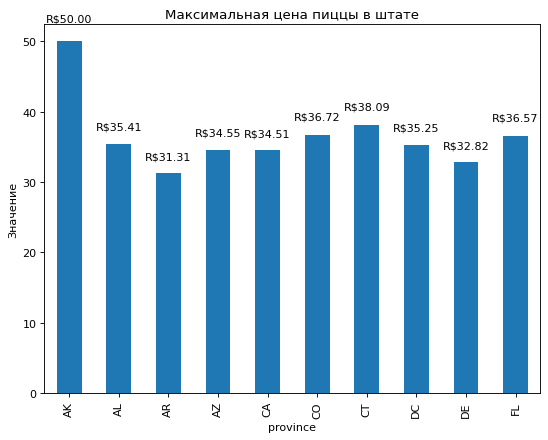

In [13]:
plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
ax = pizzas_provPrice[:10].plot.bar()
ax.set_title("Максимальная цена пиццы в штате")
ax.set_ylabel("Значение")

rects = ax.patches

for rect in rects:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
            #'%d' % int(height),
            'R${:1.2f}'.format(height),
            ha='center', va='bottom')

plt.show()

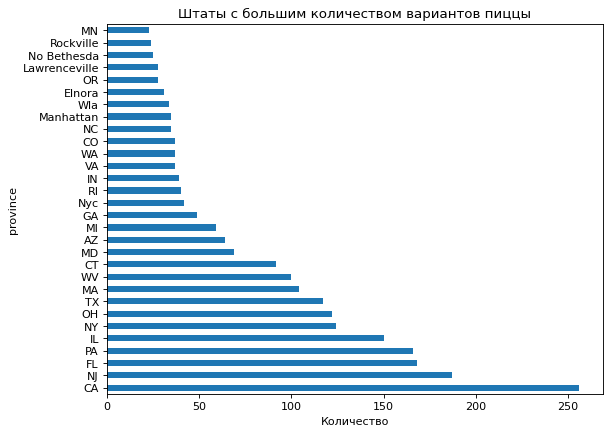

In [14]:
pizzas_prov = pizzas['province'].value_counts()

top_30_states = pizzas_prov[:30]

plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
top_30_states.plot.barh()
plt.title('Штаты с большим количеством вариантов пиццы')
plt.xlabel('Количество')
plt.show()

In [15]:
corr_fields = ['menus.amountMin', 'priceRangeMin', 'priceRangeMax']
corr_matrix = pizzas[corr_fields].corr()
print(corr_matrix)

                 menus.amountMin  priceRangeMin  priceRangeMax
menus.amountMin         1.000000       0.049578       0.033906
priceRangeMin           0.049578       1.000000       0.818882
priceRangeMax           0.033906       0.818882       1.000000
